![](https://images.pexels.com/photos/145994/pexels-photo-145994.jpeg?cs=srgb&dl=red-panda-on-brown-wood-145994.jpg&fm=jpg)

# Plotting in Pandas

Kevin J. Walchko, Phd

11 Apr 2020 
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>

---

Pivot tables allow you to re-arrange your data to gain new insight. Although there are many parameters to pivot tables, important ones are:

- data: the `pandas.DataFrame` to work with
- index: the *column* we are exploring
- values[optional]: what to aggregate. If not specified, then all numeric columns will be used
- aggfunc: how to aggregate the data

In [1]:
import pandas as pd
import numpy as np

In [83]:
animals = {
    0:  {'name':'falcon',  'legs': 2, 'wings': 2, 'seen': 10},
    1:  {'name': 'robin',  'legs': 2, 'wings': 2, 'seen': 8},
    2:  {'name': 'bluejay','legs': 2, 'wings': 2, 'seen': 4},
    3:  {'name': 'fish',   'legs': 0, 'wings': 0, 'seen': 8},
    4:  {'name': 'horse',  'legs': 4, 'wings': 0, 'seen': 5},
    5:  {'name': 'dog',    'legs': 4, 'wings': 0, 'seen': 22},
    6:  {'name': 'cat',    'legs': 4, 'wings': 0, 'seen': 12},
    7:  {'name': 'squirl', 'legs': 4, 'wings': 0, 'seen': 28},
    8:  {'name': 'spider', 'legs': 8, 'wings': 0, 'seen': 11},
    9:  {'name': 'ant',    'legs': 6, 'wings': 0, 'seen': 28},
    10: {'name': 'wasp',   'legs': 6, 'wings': 2, 'seen': 28},
    11: {'name': 'unicorn','legs': 4, 'wings': 0, 'seen': 0},
    12: {'name': 'pegasus','legs': 4, 'wings': 2, 'seen': 0}
}
# animals = {
#     'falcon':  {'legs': 2, 'wings': 2, 'seen': 10},
#     'robin':   {'legs': 2, 'wings': 2, 'seen': 8},
#     'bluejay': {'legs': 2, 'wings': 2, 'seen': 4},
#     'dog':     {'legs': 4, 'wings': 0, 'seen': 22},
#     'cat':     {'legs': 4, 'wings': 0, 'seen': 12},
#     'squirl':  {'legs': 4, 'wings': 0, 'seen': 28},
#     'spider':  {'legs': 8, 'wings': 0, 'seen': 11},
#     'ant':     {'legs': 6, 'wings': 0, 'seen': 28},
#     'wasp':    {'legs': 6, 'wings': 2, 'seen': 12},
#     'fish':    {'legs': 0, 'wings': 0, 'seen': 8},
#     'horse':   {'legs': 4, 'wings': 0, 'seen': 5},
#     'unicorn': {'legs': 4, 'wings': 0, 'seen': 0},
#     'pegasus': {'legs': 4, 'wings': 2, 'seen': 0}
# }

df = pd.DataFrame(animals)
df = df.transpose()
df.head()

,name,legs,wings,seen
0,falcon,2,2,10
1,robin,2,2,8
2,bluejay,2,2,4
3,fish,0,0,8
4,horse,4,0,5


In [84]:
# sort the data frame by number of legs in ascending order ...
# so fish are first (no legs)
df.sort_values(["legs"], ascending=[True], inplace=True)
df.head()

,name,legs,wings,seen
3,fish,0,0,8
0,falcon,2,2,10
1,robin,2,2,8
2,bluejay,2,2,4
4,horse,4,0,5


In [85]:
# so using the columns legs/wings, we can see how 
# different animals fall into the legs/wings groupings.
# Also, for places that would have NaN, I filled with
# " " using fill_value()
table = pd.pivot_table(df, index=["legs", "wings"], values="seen", columns="name", aggfunc=np.sum,fill_value=" ")
table.head()

name       ant bluejay cat dog falcon fish horse pegasus robin spider squirl  \
legs wings                                                                     
0    0                                   8                                     
2    2               4             10                        8                 
4    0                  12  22                 5                          28   
     2                                                 0                       
6    0      28                                                                 

name       unicorn wasp  
legs wings               
0    0                   
2    2                   
4    0           0       
     2                   
6    0

In [86]:
# let's simplify this and just look at legs as the index
#  Notice, since the `afffunc` is sum, the name gets added
# up into one nonse string
table = pd.pivot_table(df, index=["legs"], aggfunc=np.sum)
table.head()

,name,seen,wings
legs,,,
0,fish,8,0
2,falconrobinbluejay,22,6
4,horsedogcatsquirlunicornpegasus,67,2
6,antwasp,56,2
8,spider,11,0


In [74]:
# now we are setting the values columns that should be
# added together and avoid the non-sense colun string 
# name we get from the previous examle ... but it still
# has the same meaningful results
#
# How many animal with different sets of legs, have "I seen" or "have wings"
table = pd.pivot_table(df, index=["legs"], values=["seen","wings"],aggfunc=np.sum)
table.head()

,seen,wings
legs,,
0,8,0
2,22,6
4,67,2
6,28,0
8,11,0


In [69]:
# same thing, but don't sum values, just count "is there one"?
table = pd.pivot_table(df, index=["legs"], values=["seen","wings"],aggfunc='count')
table.head()

,seen,wings
legs,,
0,1,1
2,3,3
4,6,6
6,2,2
8,1,1


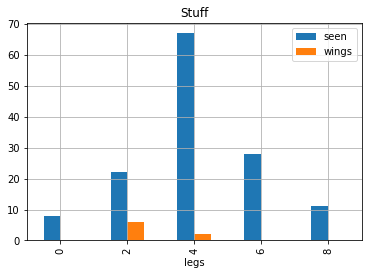

In [76]:
table.plot(kind="bar", grid=True, title="Stuff");